#Laboratorio 8 Data Science

###Oscar De Leon 19298
###Mirka Monzon 18139

In [83]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import seaborn as sns 
import statsmodels.api as sm


####Carga de Datos

Confirmed


In [59]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
confirmed = confirmed.rename(columns = {'Country/Region':'Country', 'Province/State':'State'})
confirmed = confirmed.melt(id_vars = ['State','Country', 'Lat', 'Long'], var_name ='date1', value_name = 'confirmed')
confirmed = confirmed.assign(Date = pd.to_datetime(confirmed.date1, format='%m/%d/%y'))
confirmed = confirmed.drop('date1', axis=1)
confirmed = confirmed.filter(['Country','State','Date','Lat','Long','confirmed']).sort_values(['Country','State','Date','Lat','Long'])
confirmed

,Country,State,Date,Lat,Long,confirmed
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0
289,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0
578,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0
867,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0
1156,Afghanistan,NaN,2020-01-26,33.939110,67.709953,0
...,...,...,...,...,...,...
289288,Zimbabwe,NaN,2022-10-18,-19.015438,29.154857,257893
289577,Zimbabwe,NaN,2022-10-19,-19.015438,29.154857,257893
289866,Zimbabwe,NaN,2022-10-20,-19.015438,29.154857,257893
290155,Zimbabwe,NaN,2022-10-21,-19.015438,29.154857,257893


In [60]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290445 entries, 0 to 290444
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Country    290445 non-null  object        
 1   State      91455 non-null   object        
 2   Date       290445 non-null  datetime64[ns]
 3   Lat        288435 non-null  float64       
 4   Long       288435 non-null  float64       
 5   confirmed  290445 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 15.5+ MB


Deaths

In [66]:
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
deaths = deaths.rename(columns = {'Country/Region':'Country', 'Province/State':'State'})
deaths = deaths.melt(id_vars = ['State','Country', 'Lat', 'Long'], var_name ='date1', value_name = 'death')
deaths = deaths.assign(Date = pd.to_datetime(deaths.date1, format='%m/%d/%y'))
deaths = deaths.drop('date1', axis=1)
deaths = deaths.drop('Lat', axis=1)
deaths = deaths.drop('Long', axis=1)
deaths = deaths.filter(['Country','State','Date','death']).sort_values(['Country','State','Date'])
deaths

,Country,State,Date,death
0,Afghanistan,NaN,2020-01-22,0
289,Afghanistan,NaN,2020-01-23,0
578,Afghanistan,NaN,2020-01-24,0
867,Afghanistan,NaN,2020-01-25,0
1156,Afghanistan,NaN,2020-01-26,0
...,...,...,...,...
289288,Zimbabwe,NaN,2022-10-18,5606
289577,Zimbabwe,NaN,2022-10-19,5606
289866,Zimbabwe,NaN,2022-10-20,5606
290155,Zimbabwe,NaN,2022-10-21,5606


In [57]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290445 entries, 0 to 290444
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Country  290445 non-null  object        
 1   State    91455 non-null   object        
 2   Date     290445 non-null  datetime64[ns]
 3   Lat      288435 non-null  float64       
 4   Long     288435 non-null  float64       
 5   death    290445 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 15.5+ MB


Recovered

In [67]:
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
recovered = recovered.rename(columns = {'Country/Region':'Country', 'Province/State':'State'})
recovered = recovered.melt(id_vars = ['State','Country', 'Lat', 'Long'], var_name ='date1', value_name = 'recovered')
recovered = recovered.assign(Date = pd.to_datetime(recovered.date1, format='%m/%d/%y'))
recovered = recovered.drop('date1', axis=1)
recovered = recovered.drop('Lat', axis=1)
recovered = recovered.drop('Long', axis=1)
recovered = recovered.filter(['Country','State','Date','recovered']).sort_values(['Country','State','Date'])
recovered

,Country,State,Date,recovered
0,Afghanistan,NaN,2020-01-22,0
274,Afghanistan,NaN,2020-01-23,0
548,Afghanistan,NaN,2020-01-24,0
822,Afghanistan,NaN,2020-01-25,0
1096,Afghanistan,NaN,2020-01-26,0
...,...,...,...,...
274273,Zimbabwe,NaN,2022-10-18,0
274547,Zimbabwe,NaN,2022-10-19,0
274821,Zimbabwe,NaN,2022-10-20,0
275095,Zimbabwe,NaN,2022-10-21,0


In [58]:
recovered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275370 entries, 0 to 275369
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Country    275370 non-null  object        
 1   State      75375 non-null   object        
 2   Date       275370 non-null  datetime64[ns]
 3   Lat        274365 non-null  float64       
 4   Long       274365 non-null  float64       
 5   recovered  275370 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 14.7+ MB


####Merge de datos

In [79]:
data = (confirmed.merge(deaths, on = ['Country','State','Date'], how = 'left'))
data = (data.merge(recovered, on = ['Country','State','Date'], how = 'left'))
data

,Country,State,Date,Lat,Long,confirmed,death,recovered
0,Afghanistan,NaN,2020-01-22,33.939110,67.709953,0,0,0.0
1,Afghanistan,NaN,2020-01-23,33.939110,67.709953,0,0,0.0
2,Afghanistan,NaN,2020-01-24,33.939110,67.709953,0,0,0.0
3,Afghanistan,NaN,2020-01-25,33.939110,67.709953,0,0,0.0
4,Afghanistan,NaN,2020-01-26,33.939110,67.709953,0,0,0.0
...,...,...,...,...,...,...,...,...
290440,Zimbabwe,NaN,2022-10-18,-19.015438,29.154857,257893,5606,0.0
290441,Zimbabwe,NaN,2022-10-19,-19.015438,29.154857,257893,5606,0.0
290442,Zimbabwe,NaN,2022-10-20,-19.015438,29.154857,257893,5606,0.0
290443,Zimbabwe,NaN,2022-10-21,-19.015438,29.154857,257893,5606,0.0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290445 entries, 0 to 290444
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Country    290445 non-null  object        
 1   State      91455 non-null   object        
 2   Date       290445 non-null  datetime64[ns]
 3   Lat        288435 non-null  float64       
 4   Long       288435 non-null  float64       
 5   confirmed  290445 non-null  int64         
 6   death      290445 non-null  int64         
 7   recovered  274365 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 19.9+ MB


####Analsis exploratorio

In [82]:
data.columns

Index(['Country', 'State', 'Date', 'Lat', 'Long', 'confirmed', 'death',
       'recovered'],
      dtype='object')

In [81]:
data.describe()

,Lat,Long,confirmed,death,recovered
count,288435.000000,288435.000000,2.904450e+05,2.904450e+05,2.743650e+05
mean,19.718719,22.182084,7.790478e+05,1.202147e+04,8.465806e+04
std,25.911393,77.735284,4.164392e+06,5.891061e+04,7.509262e+05
min,-71.949900,-178.116500,0.000000e+00,0.000000e+00,-1.000000e+00
25%,3.933900,-42.604300,4.350000e+02,2.000000e+00,0.000000e+00
50%,21.512583,20.939400,1.038500e+04,1.160000e+02,0.000000e+00
75%,40.463667,90.356300,1.758120e+05,2.501000e+03,1.597000e+03
max,71.706900,178.065000,9.719053e+07,1.067685e+06,3.097475e+07


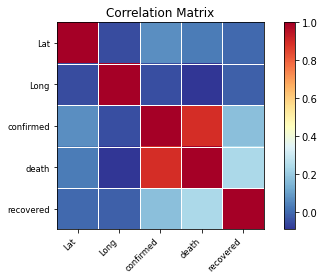

In [85]:
corr = data.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()